In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read in Data

data = pd.read_table('TaylorSwiftSongs.csv', delimiter=',')
data = data.drop('Unnamed: 0', axis=1)
data

,Title,Album,Track Number,Play Count,Duration in Seconds,Peak Chart Position,Weeks on Chart,Single,Music Video
0,Tim McGraw,Taylor Swift,1,85138178,232.106,40,20,1,1
1,Picture To Burn,Taylor Swift,2,113566507,173.066,28,20,0,0
2,Teardrops On My Guitar,Taylor Swift,3,155987793,203.040,13,48,0,0
3,A Place in this World,Taylor Swift,4,24373065,199.200,-1,-1,0,0
4,Cold As You,Taylor Swift,5,25393464,239.013,-1,-1,0,0
...,...,...,...,...,...,...,...,...,...
195,Dear Reader,Midnights,20,62683463,225.194,45,2,0,0
196,Eyes Open,Single,1,46077237,244.586,19,13,1,0
197,Highway Don't Care,Single,1,184665086,276.880,22,20,1,1
198,I Don’t Wanna Live Forever,Single,1,1360889849,247.160,-1,-1,1,0


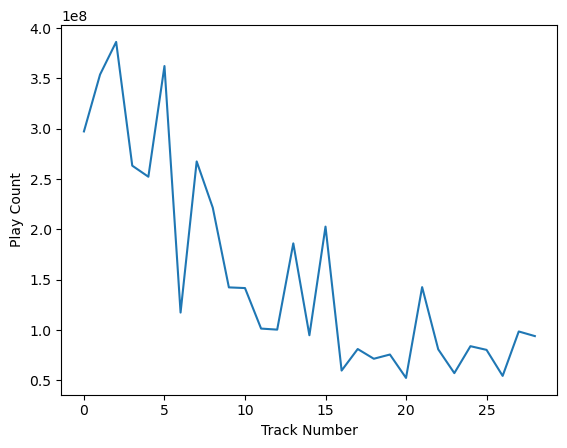

In [3]:
# Play Count by Track Number

track_avg = list(data.groupby('Track Number')['Play Count'].mean())
plt.plot(track_avg)
plt.xlabel('Track Number')
plt.ylabel('Play Count');

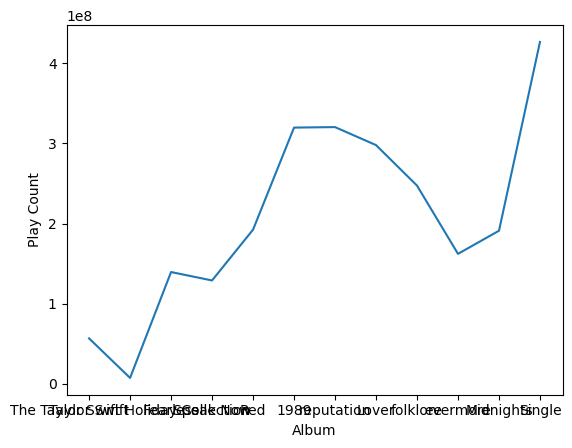

In [4]:
# Play Count by Album

album_avg = data.groupby('Album', sort=False)['Play Count'].mean()
plt.plot(album_avg)
plt.xlabel('Album')
plt.ylabel('Play Count');

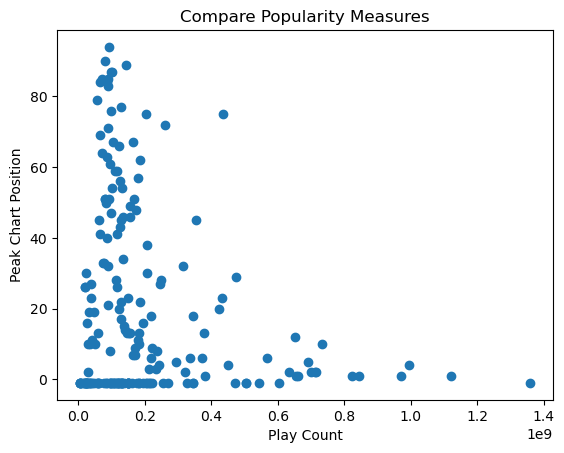

In [5]:
# Play Count v Peak Chart Position

plt.scatter(data['Play Count'], data['Peak Chart Position'])
plt.xlabel('Play Count')
plt.ylabel('Peak Chart Position')
plt.title('Compare Popularity Measures');

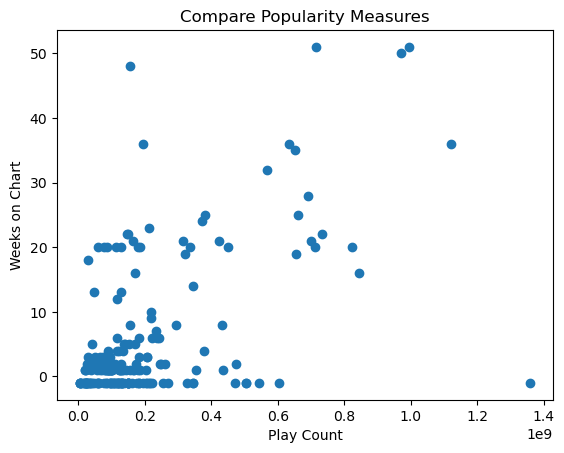

In [6]:
# Play Count v Weeks on Chart

plt.scatter(data['Play Count'], data['Weeks on Chart'])
plt.xlabel('Play Count')
plt.ylabel('Weeks on Chart')
plt.title('Compare Popularity Measures');

In [7]:
# Sorted by Play Count

data_play = data[data['Album']!='The Taylor Swift Holiday Collection']
data_play.sort_values('Play Count', axis=0)

,Title,Album,Track Number,Play Count,Duration in Seconds,Peak Chart Position,Weeks on Chart
13,A Perfectly Good Heart,Taylor Swift,14,14895432,220.146000,-1,-1
5,The Outside,Taylor Swift,6,16869653,207.106000,-1,-1
63,Superman,Speak Now,17,19503402,275.960000,26,1
6,Tied Together with a Smile,Taylor Swift,7,19739082,248.106000,-1,-1
38,Superstar,Fearless,18,21113100,263.865000,26,1
...,...,...,...,...,...,...,...
68,All Too Well,Red,5,845784469,423.359667,1,16
98,Shake It Off,1989,6,969308758,219.200000,1,50
23,Love Story,Fearless,3,994241372,235.516000,4,51
94,Blank Space,1989,2,1122089962,181.506000,1,36


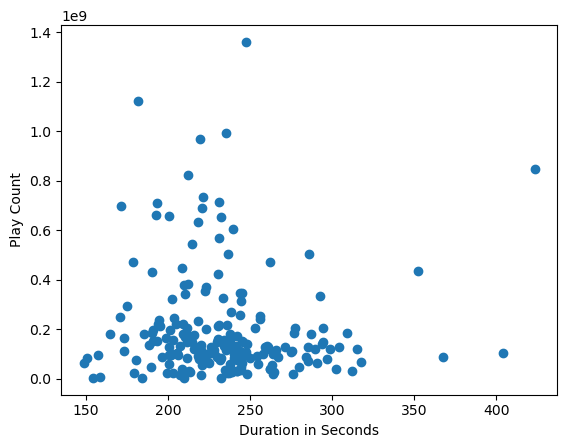

In [8]:
# Play Count by Duration in Seconds

plt.scatter(data['Duration in Seconds'], data['Play Count'])
plt.xlabel('Duration in Seconds')
plt.ylabel('Play Count');

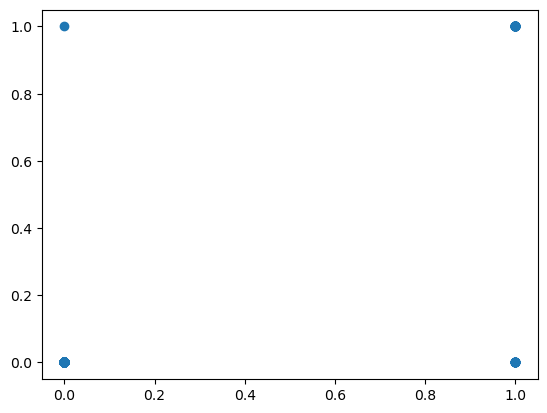

In [5]:
# Singles vs Music Video

plt.scatter(data['Single'], data['Music Video']);

C:\Users\kelse\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\kelse\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 80.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\kelse\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Single', ylabel='Music Video'>

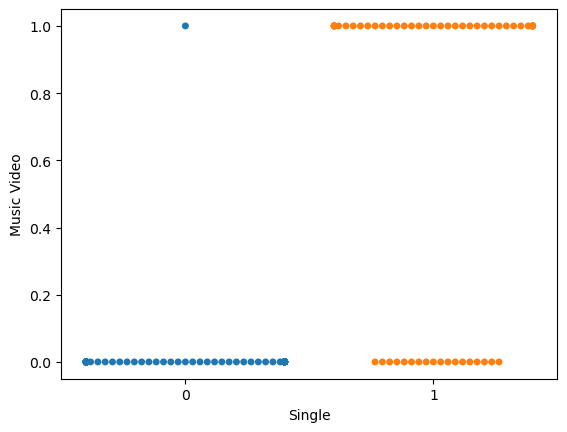

In [6]:
sns.swarmplot('Single','Music Video',data=data)